In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and understanding the data

In [2]:
boombike = pd.read_csv('D:\PGDDS\Machine Learning\Module 2\day.csv')
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
boombike.shape

(730, 16)

In [4]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
boombike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def number_to_season(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    elif x==4:
        return 'winter'
    
boombike['season']=boombike.season.apply(number_to_season)

In [8]:
def num_to_month(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

boombike[['mnth']] = boombike[['mnth']].apply(num_to_month)

In [9]:
def num_to_days(x):
    return x.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'})
    
boombike[['weekday']]=boombike[['weekday']].apply(num_to_days)

In [10]:
def num_to_weathertype(x):
    return x.map({1:'Clear, Few clouds', 2:'Mist + Cloudy', 3:'Light Snow, Light Rain', 4:'Heavy Rain + Ice Pallets'})
    
boombike[['weathersit']]=boombike[['weathersit']].apply(num_to_weathertype)

In [11]:
boombike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,"Clear, Few clouds",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,"Clear, Few clouds",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,"Clear, Few clouds",9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [13]:
boombike['dteday'] = boombike['dteday'].astype('datetime64')

In [14]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Visualising Numeric Variables

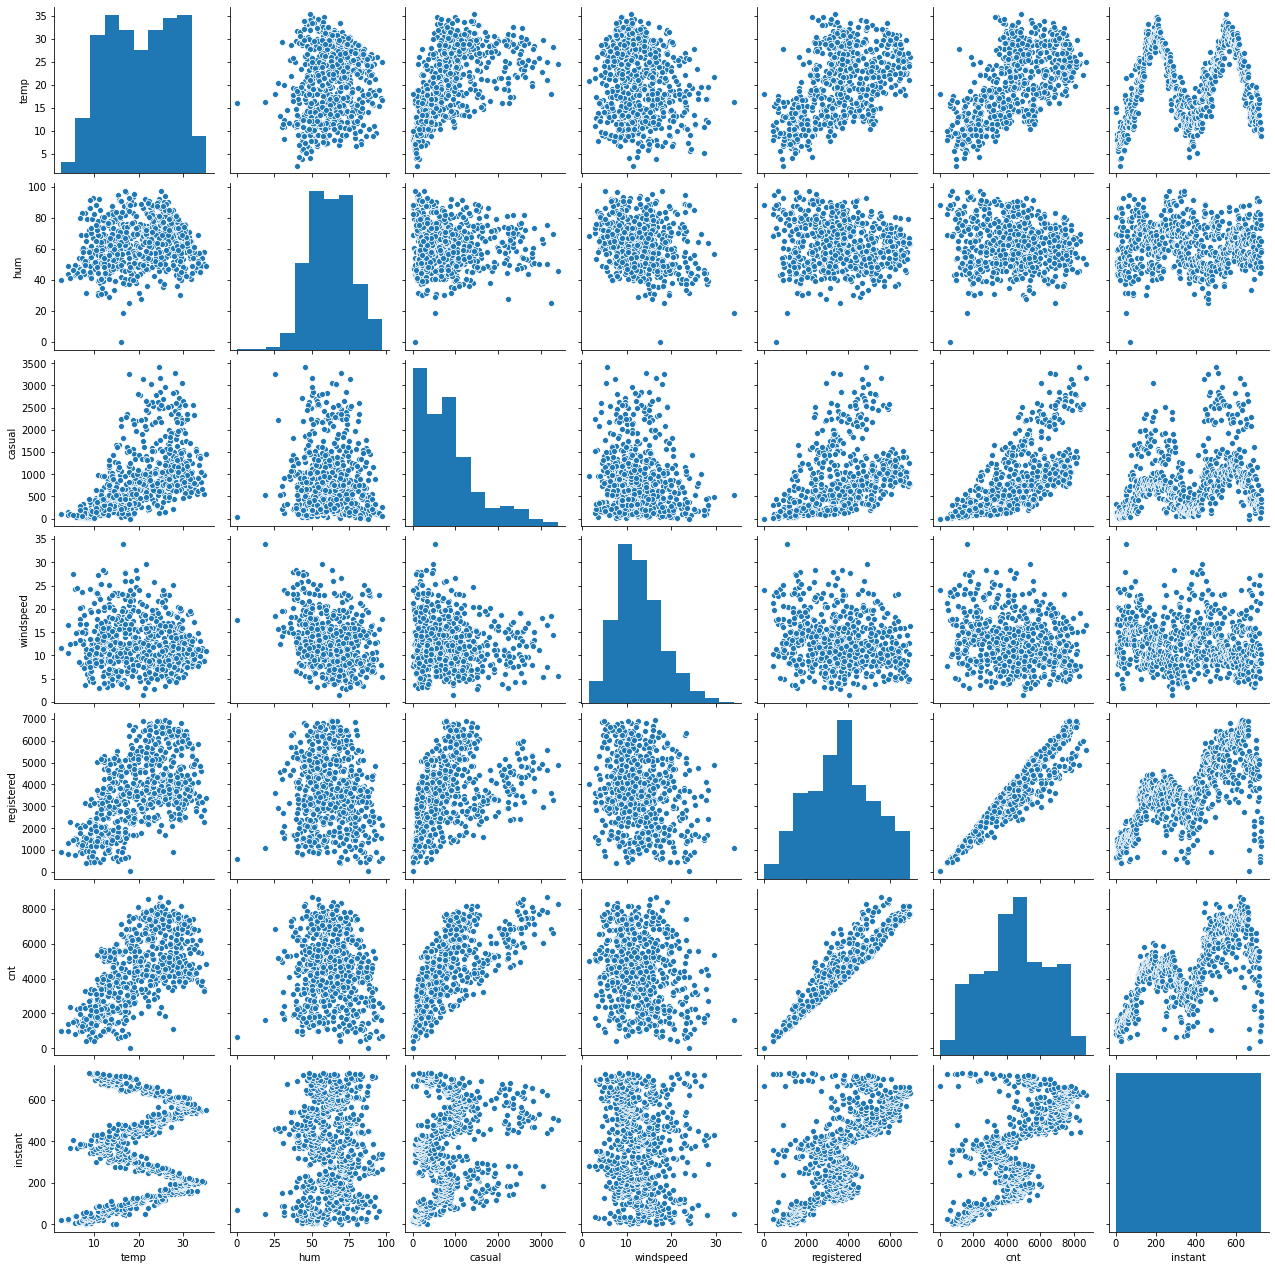

In [15]:
sns.pairplot(boombike, vars=['temp','hum','casual','windspeed','registered','cnt','instant'])
plt.show()

### Visualising Categorical Variables

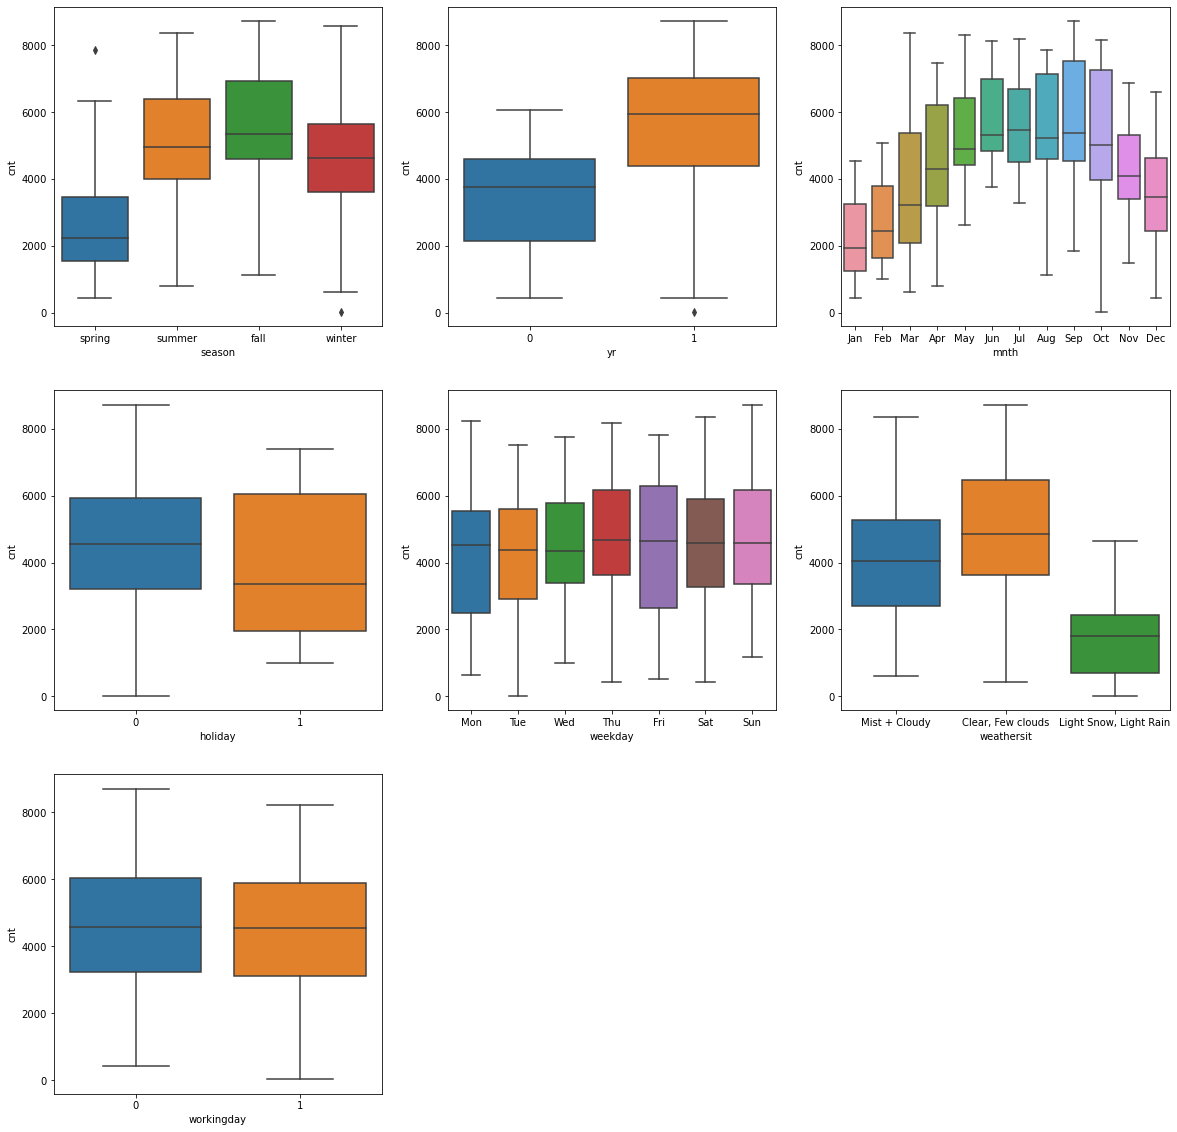

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season',y='cnt',data=boombike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr',y='cnt',data=boombike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth',y='cnt',data=boombike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday',y='cnt',data=boombike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday',y='cnt',data=boombike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit',y='cnt',data=boombike)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday',y='cnt',data=boombike)

plt.show()

### The plots above shows the relationship between categorical variables and a Target variable.

Count of Total rental bikes are more during the Fall season and then in summer

Count of Total rental bikes are more in the year 2019 compared to 2018

Count of Total rental bikes are more in partly cloudy weather

Count of Total rental bikes are more on Saturday,wednesday and thursday

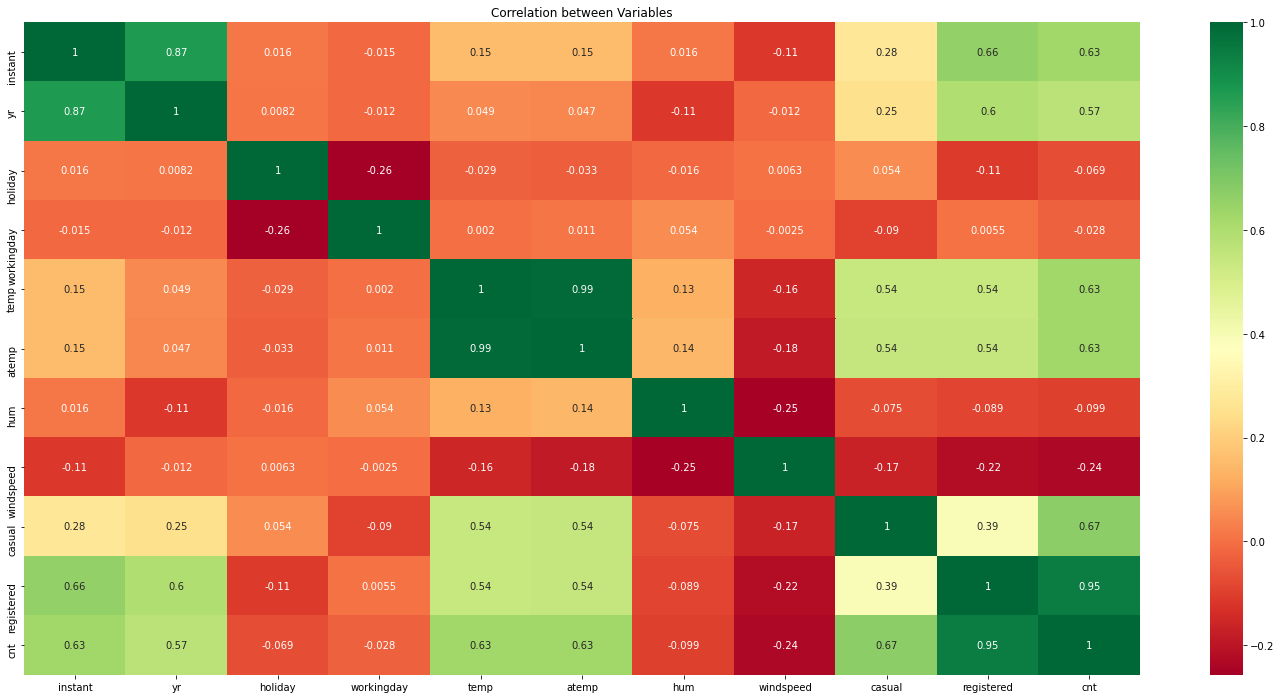

In [17]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(boombike.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

#### As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable

We can also see some other variables are also most correlated.

Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model

So we can consider a Linear Regression Model.

In [18]:
# Drop the unnecessary columns

boombike = boombike.drop(['instant','dteday','atemp','casual','registered'],axis=1)
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,"Clear, Few clouds",8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,"Clear, Few clouds",8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,"Clear, Few clouds",9.305237,43.6957,12.522300,1600


## Step 3: Data Preparation

### Dummy Variables

In [19]:
# Categorical var

boombike_categorical = boombike.select_dtypes(include=['object'])
boombike_categorical.columns


Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [20]:
boombike_dummies = pd.get_dummies(boombike_categorical,drop_first=True)
boombike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
boombike = pd.concat([boombike,boombike_dummies],axis=1)
boombike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,"Clear, Few clouds",8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,"Clear, Few clouds",8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,"Clear, Few clouds",9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [22]:
boombike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   season                             730 non-null    object 
 1   yr                                 730 non-null    int64  
 2   mnth                               730 non-null    object 
 3   holiday                            730 non-null    int64  
 4   weekday                            730 non-null    object 
 5   workingday                         730 non-null    int64  
 6   weathersit                         730 non-null    object 
 7   temp                               730 non-null    float64
 8   hum                                730 non-null    float64
 9   windspeed                          730 non-null    float64
 10  cnt                                730 non-null    int64  
 11  season_spring                      730 non-null    uint8  

In [23]:
boombike.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
boombike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


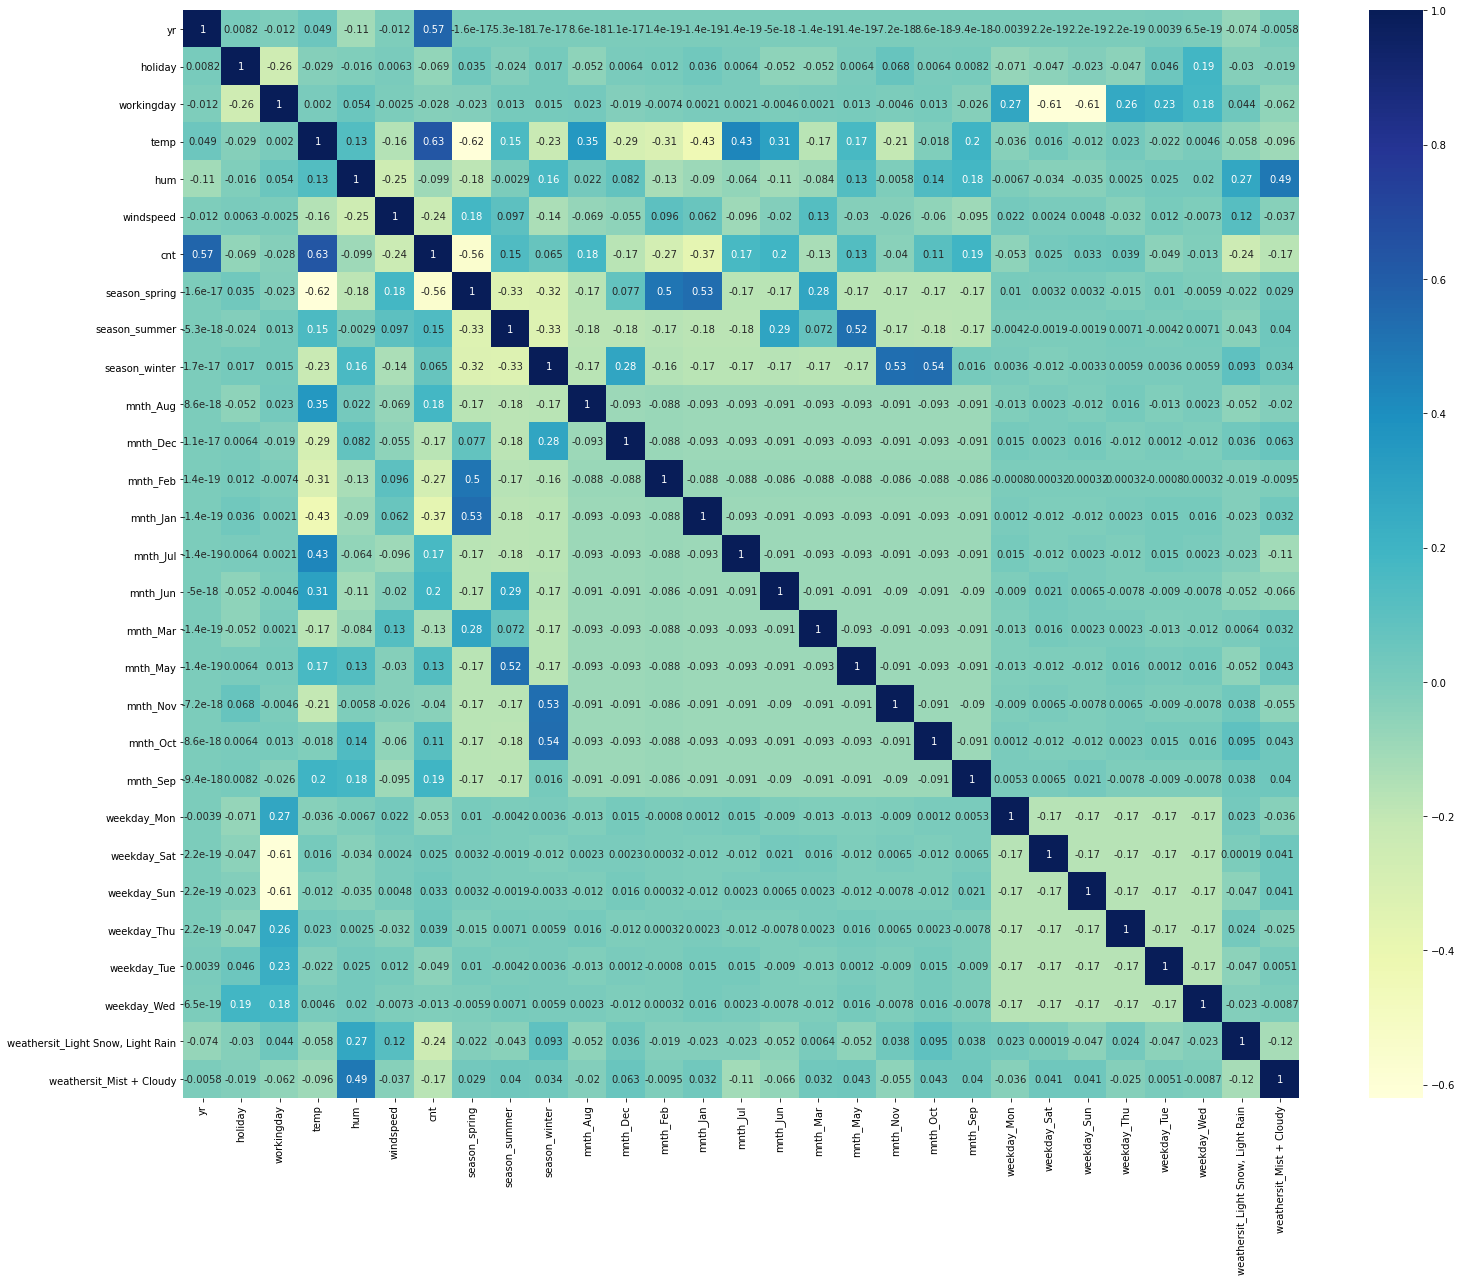

In [24]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(boombike.corr(), cmap='YlGnBu', annot = True)
plt.show()

## Step 4: Splitting the Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
boombike_train, boombike_test = train_test_split(boombike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

boombike_train[num_vars] = scaler.fit_transform(boombike_train[num_vars])

In [28]:
boombike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [29]:
boombike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


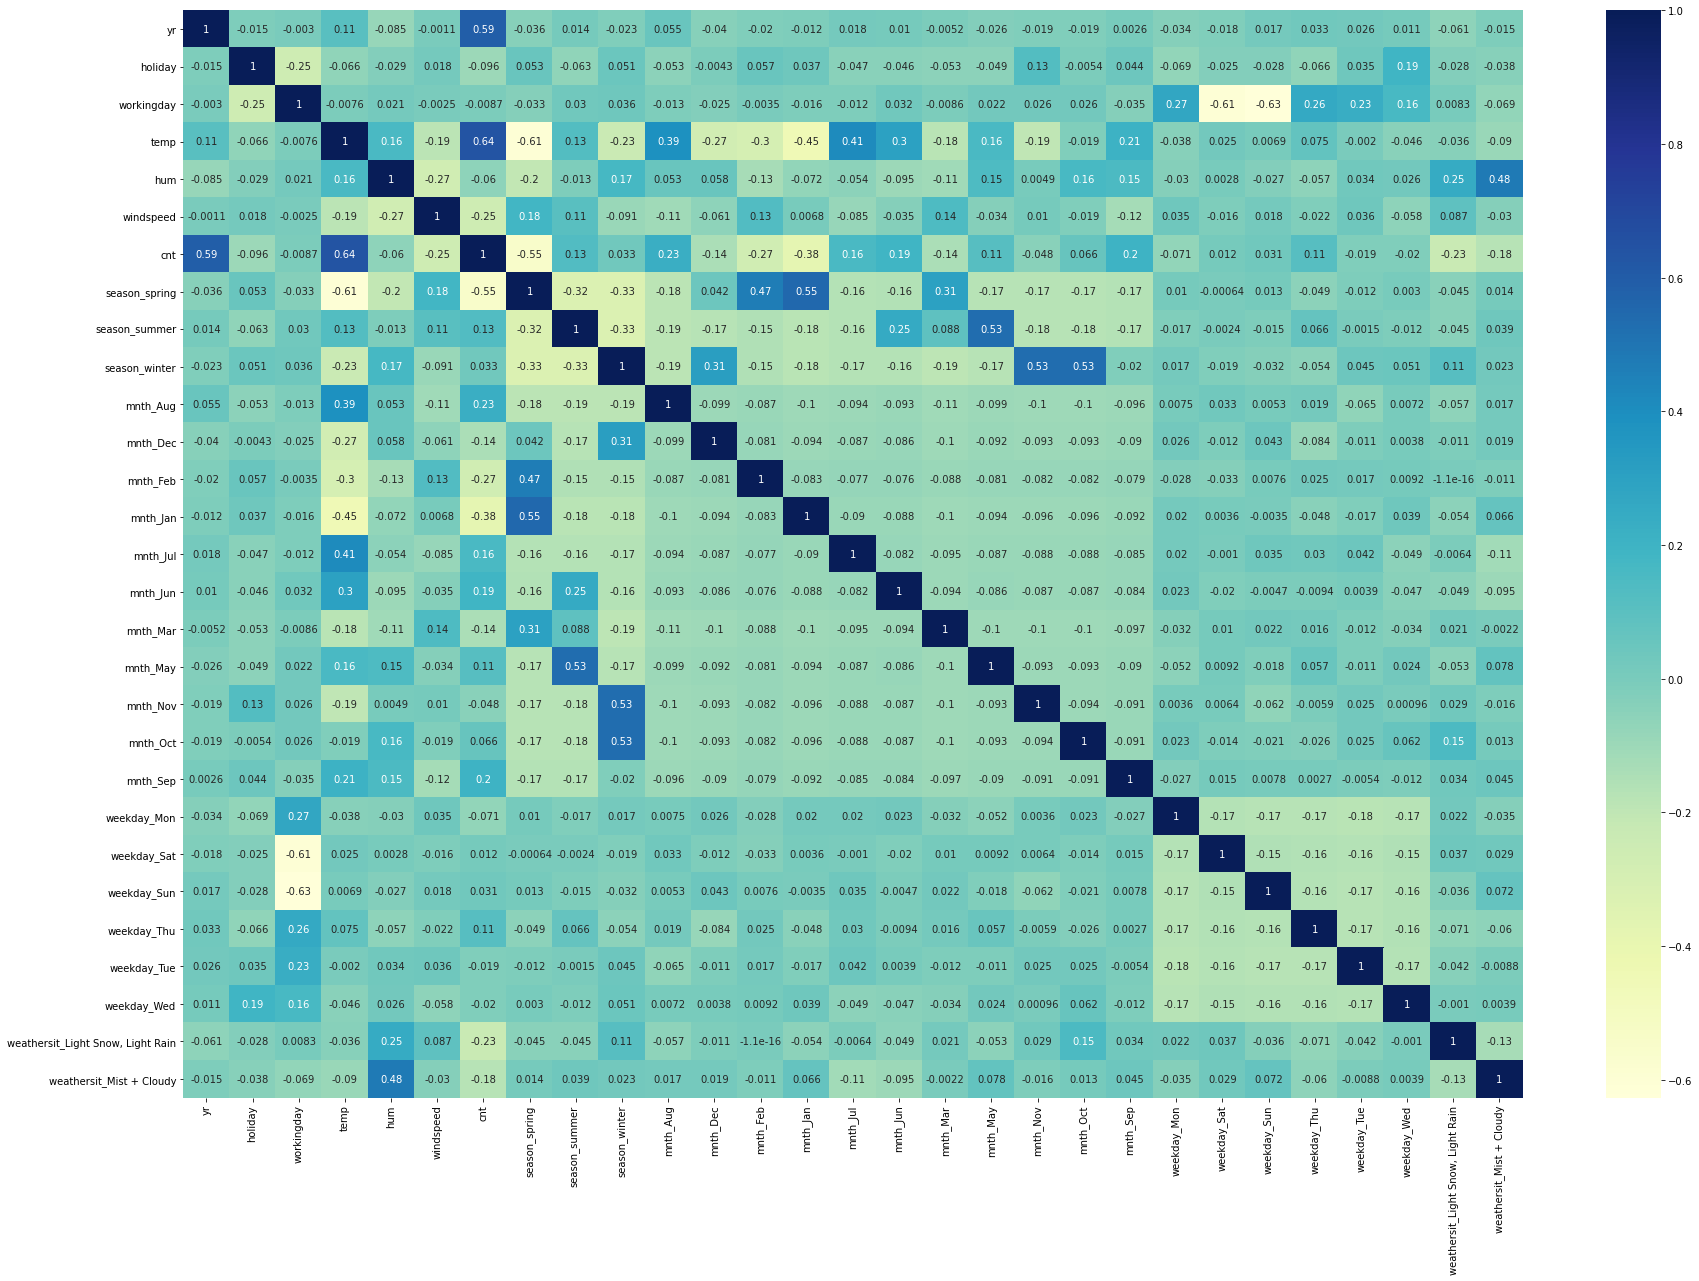

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(boombike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

### Dividing into X and Y sets for the model building

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

boombike_train, boombike_test = train_test_split(boombike, train_size = 0.7, random_state = 100)

In [32]:
print(boombike_train.shape)
print(boombike_test.shape)

(510, 29)
(220, 29)


## Rescaling

### Min-Max scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
boombike_train[num_vars] = scaler.fit_transform(boombike_train[num_vars])
boombike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [35]:
boombike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


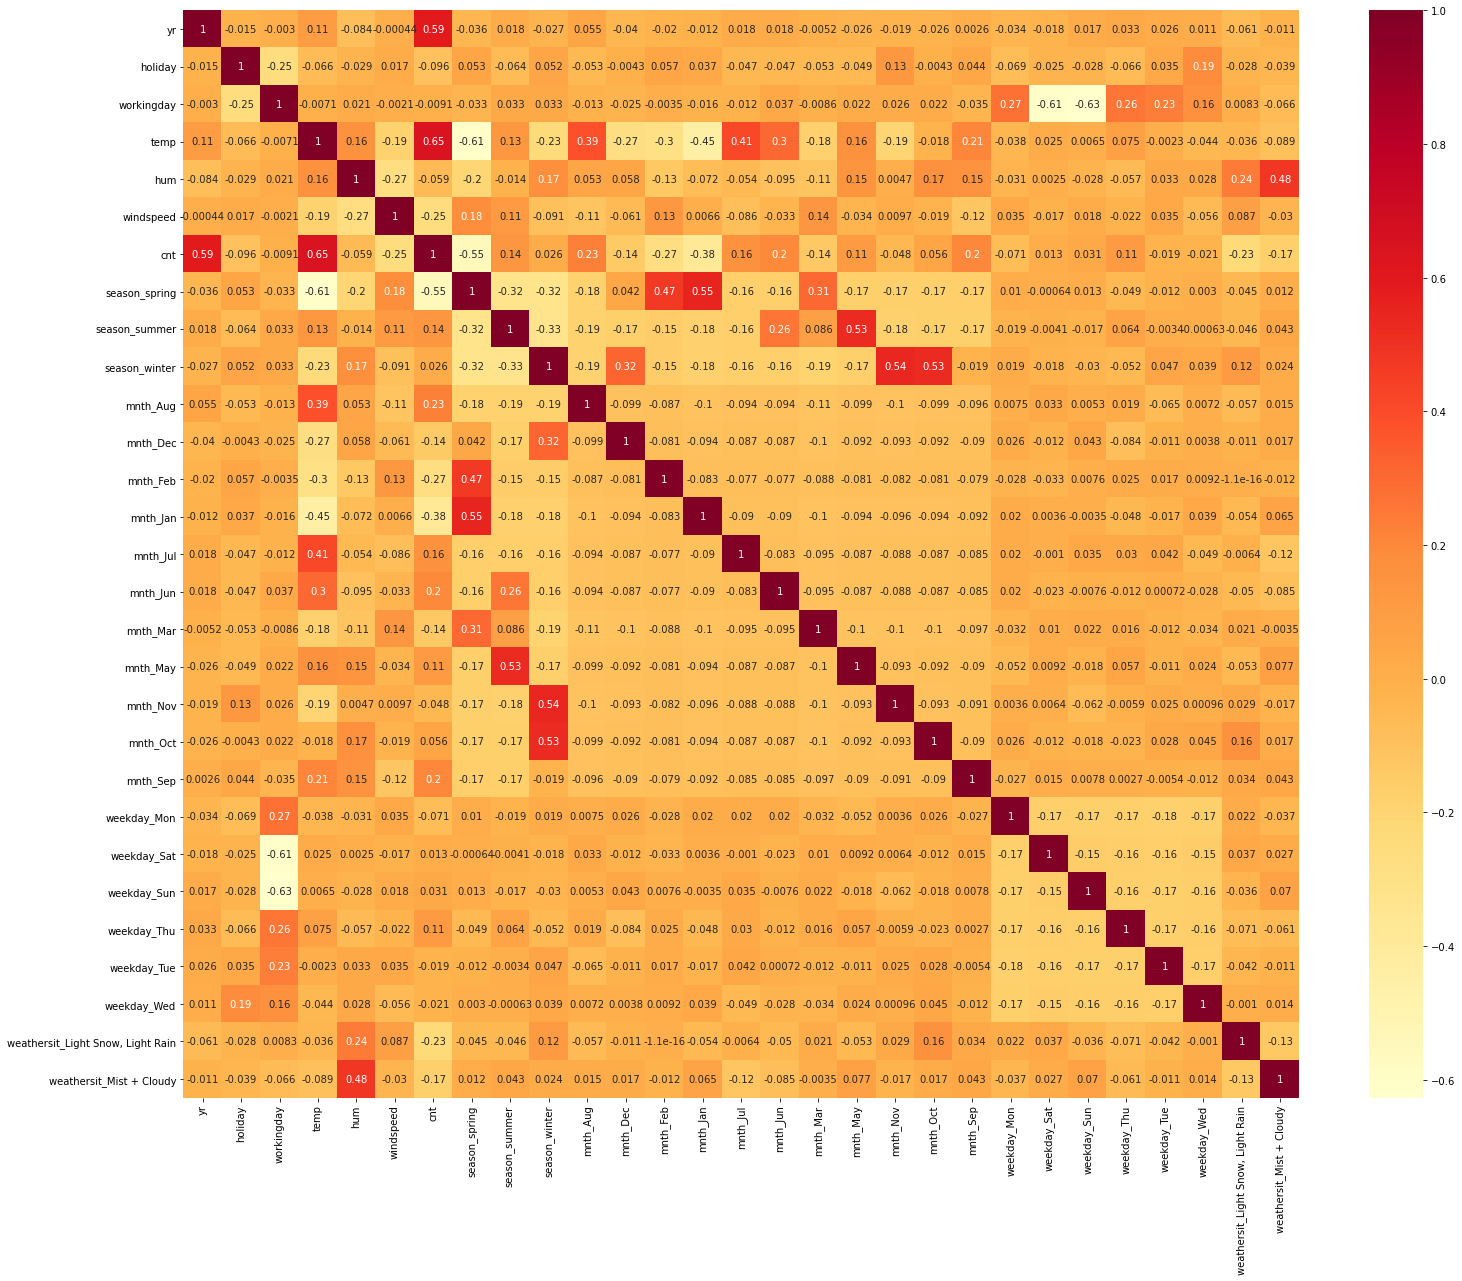

In [36]:
# Multicollinearity

plt.figure(figsize=(25, 20))
sns.heatmap(boombike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

#### From the heatmap we can see temp, year are correlated to the 'count' variable. Even in August, September months we can see the counts are little high.

In [37]:
#Divide the data into X and y
y_train = boombike_train.pop('cnt')
X_train = boombike_train

## Step 5: Building a linear model

In [38]:
# Recursive Feature Elimination

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 10),
 ('weathersit_Light Snow, Light Rain', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [41]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow, Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [42]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.15e-189
Time:                        22:08:30   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

### Check VIF

In [47]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
14,weathersit_Mist + Cloudy,2.32
0,yr,2.09
11,mnth_Nov,1.85
9,mnth_Jan,1.75


#### mnth_Dec is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [49]:
#Drop mnth_Dec
X_train_new1 = X_train_rfe.drop(["mnth_Dec"], axis = 1)

In [50]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.41e-189
Time:                        22:08:31   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [51]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [52]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.09
2,temp,16.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.80
13,weathersit_Mist + Cloudy,2.29
0,yr,2.09
8,mnth_Jan,1.67
10,mnth_Nov,1.60


#### 'mnth_Nov' variable can be dropped as its insignificant by looking at very high VIF

In [53]:
#Drop mnth_Nov
X_train_new2 = X_train_lm1.drop(["mnth_Nov"], axis = 1)

In [54]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.59e-190
Time:                        22:08:31   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

#### 'const' variable can be dropped as its insignificant by looking at very high VIF

In [55]:

#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.02
2,temp,16.71
4,windspeed,4.66
5,season_spring,4.34
7,season_winter,3.36
6,season_summer,2.79
12,weathersit_Mist + Cloudy,2.29
0,yr,2.09
8,mnth_Jan,1.67
9,mnth_Jul,1.59


#### 'mnth_Jan' variable can be dropped as its insignificant by looking at very high VIF¶

In [57]:
#Drop mnth_Jan
X_train_new3 = X_train_lm2.drop(["mnth_Jan"], axis = 1)

In [58]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.95e-190
Time:                        22:08:31   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.33
6,season_summer,2.79
11,weathersit_Mist + Cloudy,2.28
0,yr,2.08
8,mnth_Jul,1.58
9,mnth_Sep,1.38


#### 'hum' variable can be dropped as its insignificant by looking at very high VIF

In [60]:
#Drop hum
X_train_new4 = X_train_lm3.drop(["hum"], axis = 1)

In [61]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.06e-187
Time:                        22:08:31   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.57
5,season_spring,4.95
3,temp,3.38
7,season_winter,3.34
6,season_summer,2.60
8,mnth_Jul,1.48
9,mnth_Sep,1.29
4,windspeed,1.09
10,"weathersit_Light Snow, Light Rain",1.05
11,weathersit_Mist + Cloudy,1.04


In [63]:
#Drop constant
X_train_lm4= X_train_lm4.drop(['const'], axis=1)

In [64]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X =X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.57
5,season_spring,4.95
3,temp,3.38
7,season_winter,3.34
6,season_summer,2.60
8,mnth_Jul,1.48
9,mnth_Sep,1.29
4,windspeed,1.09
10,"weathersit_Light Snow, Light Rain",1.05
11,weathersit_Mist + Cloudy,1.04


#### 'windspeed' variable can be dropped as its insignificant by looking at negative coefficient

In [65]:
#Drop windspeed
X_train_new5 = X_train_lm4.drop(["windspeed"], axis = 1)

In [66]:
#Build a model
X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm4).fit()
print(lm5.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              1531.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):                        0.00
Time:                        22:08:31   Log-Likelihood:                          476.50
No. Observations:                 510   AIC:                                     -931.0
Df Residuals:                     499   BIC:                                     -884.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [67]:
vif = pd.DataFrame()
X =X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,season_summer,1.94
6,mnth_Jul,1.58
5,season_winter,1.57
9,weathersit_Mist + Cloudy,1.55
3,season_spring,1.40
7,mnth_Sep,1.34
8,"weathersit_Light Snow, Light Rain",1.07
1,holiday,1.04


#### 'mnth_Jul' variable can be dropped as its insignificant by looking at high p-value

In [68]:
#Drop mnth_Jul
X_train_new6 = X_train_lm5.drop(["mnth_Jul"], axis = 1)

In [69]:
#Build a model
X_train_lm6 = sm.add_constant(X_train_new5)
lm6 = sm.OLS(y_train,X_train_lm5).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.71e-181
Time:                        22:08:31   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [70]:
vif = pd.DataFrame()
X =X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.76
4,season_spring,4.73
3,temp,3.30
6,season_winter,3.11
5,season_summer,2.22
7,mnth_Sep,1.17
8,"weathersit_Light Snow, Light Rain",1.04
9,weathersit_Mist + Cloudy,1.04
1,yr,1.02
2,holiday,1.02


In [71]:
#Drop the constant
X_train_new7=X_train_lm6.drop(['const'],axis=1)

In [72]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
4,season_summer,1.94
6,mnth_Jul,1.58
5,season_winter,1.57
9,weathersit_Mist + Cloudy,1.55
3,season_spring,1.40
7,mnth_Sep,1.34
8,"weathersit_Light Snow, Light Rain",1.07
1,holiday,1.04


#### The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.¶
The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.824 or 82.4%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.82 or 82%

## Step 6: Residual Analysis of the train data

In [73]:
#X_train_lm6=sm.add_constant(X_train_lm6)
#X_train_lm6.columns
X_train_lm6

,const,yr,holiday,temp,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
576,1.0,1,0,0.815169,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,1,0,0,0,0,0,1
728,1.0,1,0,0.245101,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0,1,0,0,0,0,1
111,1.0,0,0,0.345824,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,1,0,0,0,0,0,0
350,1.0,0,0,0.248216,0,0,1,0,0,0,1
79,1.0,0,0,0.462664,0,1,0,0,0,0,1


In [74]:
#y train predicted
y_train_pred = lm6.predict(X_train_lm6)

In [75]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

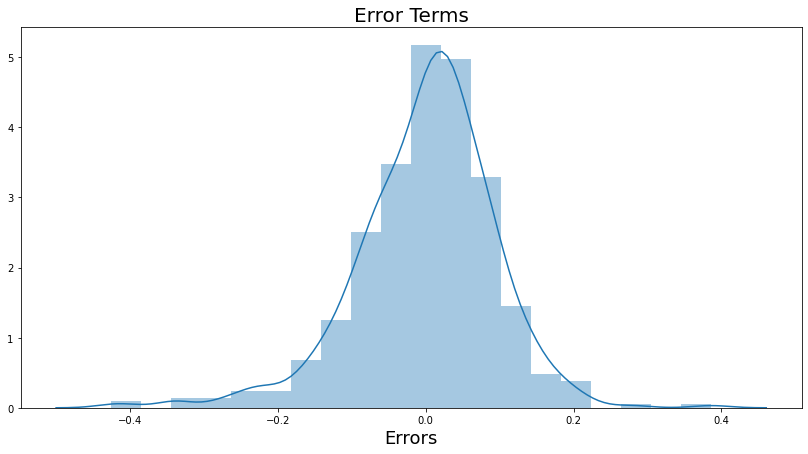

In [76]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

#### Error terms are normally distributed

## Step 7: Making Predictions

In [77]:
#Create a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fit on data
boombike_test[num_vars] = scaler.transform(boombike_test[num_vars])
boombike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [78]:
#Dividing into X_test and y_test
y_test = boombike_test.pop('cnt')
X_test = boombike_test
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
#Columns
X_train_new7.columns

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Light Snow, Light Rain', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [80]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new7.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,yr,holiday,temp,season_spring,season_summer,season_winter,mnth_Jul,mnth_Sep,"weathersit_Light Snow, Light Rain",weathersit_Mist + Cloudy
184,1.0,0,1,0.831783,0,0,0,1,0,0,1
535,1.0,1,0,0.901354,0,1,0,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0,0


In [81]:
# Making predictions
y_pred = lm6.predict(X_test_new1)

#### Finding R-squared and Adjusted R-Squared for Test set

In [82]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8092660294132246

In [83]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8092660)*(11-1)/(11-1-1)
print(Adj_r2)

0.7880733333333334


## Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

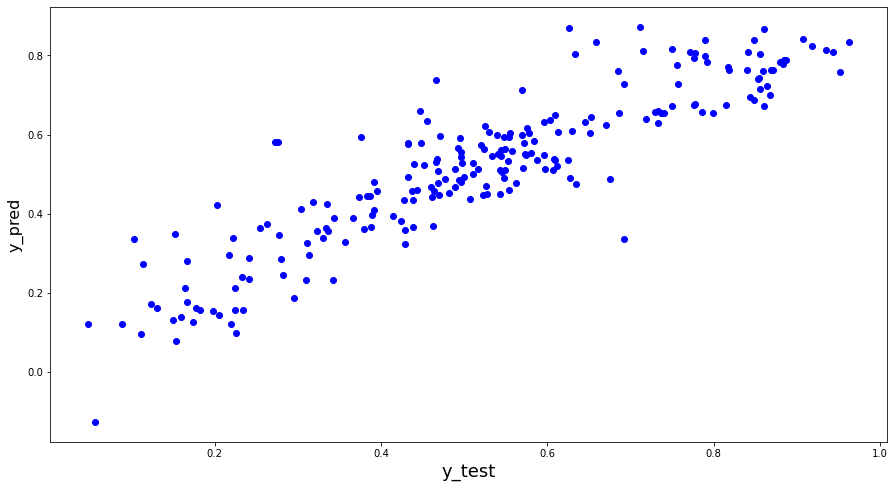

In [84]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

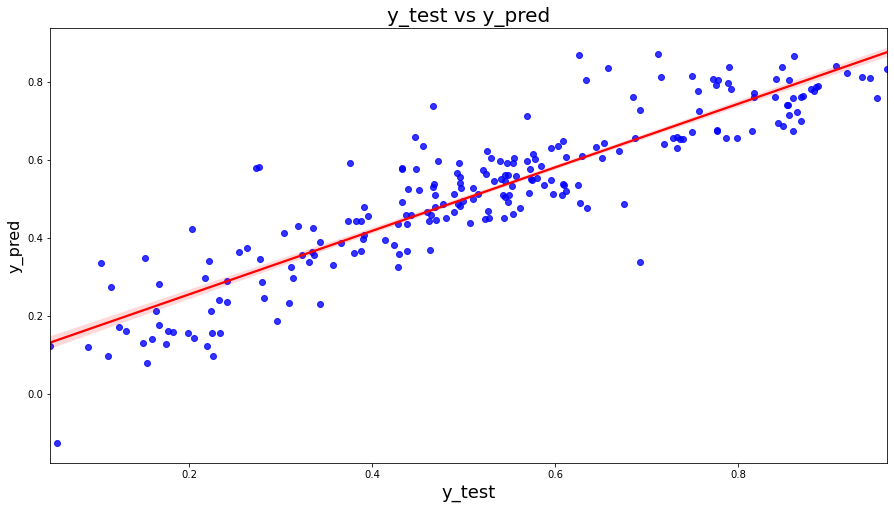

In [85]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### We can see that the equation of our best fitted line is:

count = 0.2326 × yr - 0.1003 × holiday + 0.5029 × temp - 0.0766 × spring + 0.0367 × summer + 0.0829 x winter - 0.0523 × Jul + 0.0812 × Sep − 0.2989 × lightsnow − 0.0785 × mistcloudy

## Final Result Comparison between Train model and Test:

- Train R^2 : 0.824
- Train Adjusted R^2 : 0.82
- Test R^2: 0.8092
- Test Adjusted R^2: 0.7880
- Difference in R^2 between train and test: 1.7%
- Difference in adjusted R^2 between Train and test: 3.6% which is less than 5%

## Interpretation

- We can see that temperature variable is having the highest coefficient 0.5029, which means if the temperature increases by one unit the number of bike rentals increases by 0.5029 units.

Similary we can see coefficients of other variables in the equation for best fitted line.

We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, holiday, mist cloudy , light snow, July variables with negative coefficient. 
The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

## Business Goals

- A US bike-sharing provider BoomBikes can focus more on Temperature
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better
- Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.
- We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand
- Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather and we can give offers